<a href="https://colab.research.google.com/github/HSN51/CIFAR-10-Image-Classification-Project/blob/main/CIFAR_10_Image_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras import datasets

In [ ]:
# Veri setini yükleme
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
Y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
## 60000 tane eğitim, 10000 tane test görüntümüz var
# Veriler 32*32 boyutunda

In [ ]:
# Veri setinin boyutlarını yazdırma
print("Eğitim veri seti boyutu:", X_train.shape)
print("Eğitim etiketleri boyutu:", Y_train.shape)
print("Test veri seti boyutu:", X_test.shape)
print("Test etiketleri boyutu:", Y_test.shape)

Eğitim veri seti boyutu: (50000, 32, 32, 3)
Eğitim etiketleri boyutu: (50000, 1)
Test veri seti boyutu: (10000, 32, 32, 3)
Test etiketleri boyutu: (10000, 1)



###Verileri Normalleştirme


In [ ]:
# Verileri 0-1 arasına sıkıştırdık


X_train = X_train / 255.0

X_test = X_test / 255.0

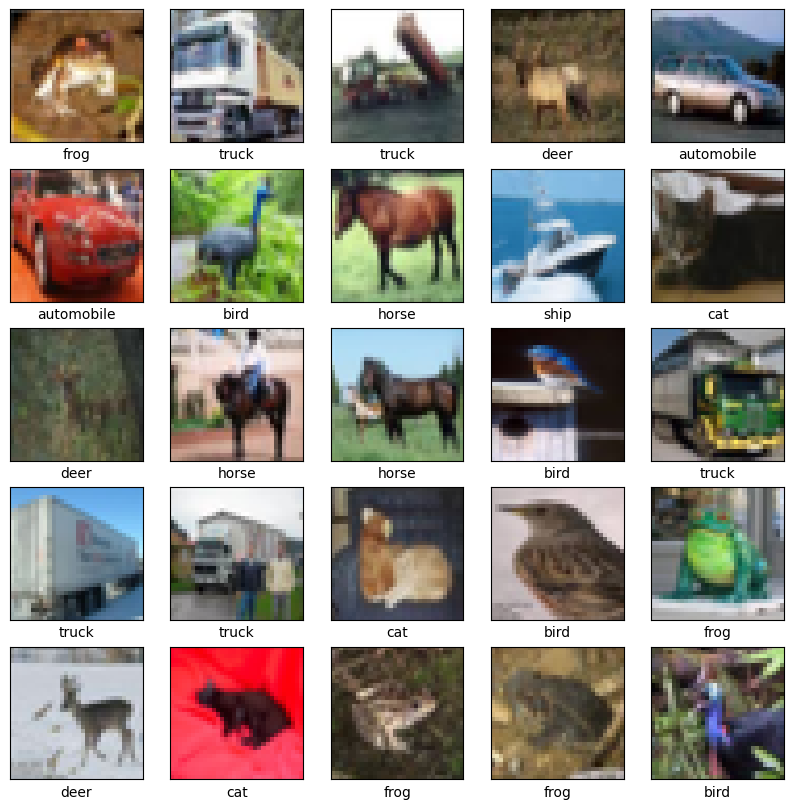

In [ ]:
# Eğitim veri setinden örnek görüntüleri görselleştirme
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

###Makine Öğrenmesi Modeli Oluşturma

In [ ]:
X_train.shape[0]

50000

In [ ]:
# Verileri düzleştirme
train_images_flat = X_train.reshape((X_train.shape[0], -1))
test_images_flat = X_test.reshape((X_test.shape[0], -1))

In [ ]:
# KNN modelini oluşturma ve eğitimi
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_images_flat, Y_train.ravel())

# Tahmin yapımı
y_pred = knn.predict(test_images_flat)


In [ ]:
# Doğruluk ve sınıflandırma raporu
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(Y_test, y_pred, target_names=class_names))

Accuracy: 0.3303
Precision: 0.430375458626426
Recall: 0.3303
F1 Score: 0.3191924379899631
Classification Report:
               precision    recall  f1-score   support

    airplane       0.32      0.57      0.41      1000
  automobile       0.58      0.24      0.34      1000
        bird       0.20      0.45      0.28      1000
         cat       0.26      0.23      0.24      1000
        deer       0.25      0.44      0.32      1000
         dog       0.43      0.21      0.28      1000
        frog       0.36      0.23      0.28      1000
       horse       0.73      0.20      0.31      1000
        ship       0.44      0.61      0.51      1000
       truck       0.73      0.12      0.21      1000

    accuracy                           0.33     10000
   macro avg       0.43      0.33      0.32     10000
weighted avg       0.43      0.33      0.32     10000



In [ ]:
# Karmaşıklık matrisi

cm = confusion_matrix(Y_test, y_pred)
cm

array([[573,   9, 109,  19,  48,   6,  22,   5, 204,   5],
       [196, 243, 125,  61, 113,  29,  37,   6, 168,  22],
       [156,   7, 450,  54, 197,  30,  59,   7,  39,   1],
       [102,  11, 281, 225, 147,  91,  89,  14,  33,   7],
       [104,   5, 291,  55, 436,  21,  36,  12,  40,   0],
       [100,   5, 249, 172, 144, 213,  68,  11,  34,   4],
       [ 49,   5, 327,  89, 252,  27, 229,   2,  20,   0],
       [131,  20, 217,  73, 235,  38,  41, 199,  44,   2],
       [183,  30,  52,  42,  51,  14,   9,   3, 612,   4],
       [193,  87, 128,  76, 110,  27,  43,  13, 200, 123]])

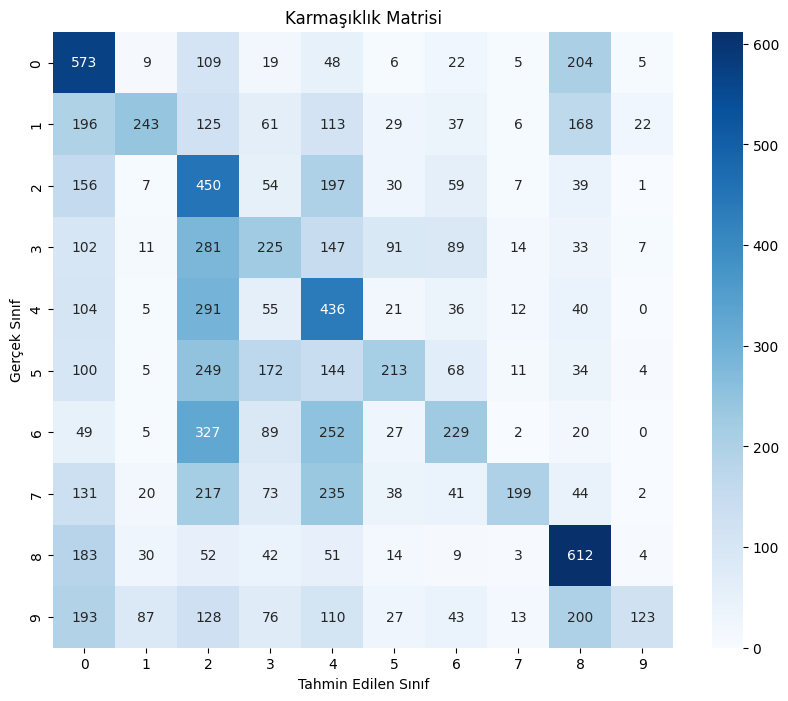

In [ ]:
# görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()